In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

## 1. Load the Data

In [2]:
beer=pd.read_csv(r'C:\Users\jomondi\Desktop\Data Analytics\Python\Beer_Brazil\Beer_cons.csv')

In [3]:
beer.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


## 2. Data Wrangling

In [4]:
# Update the name of the columns
beer.columns=[["date", "temp_medio", "temp_min", "temp_max", "rain", "weekend", "consumo"]]
beer.head()

,date,temp_medio,temp_min,temp_max,rain,weekend,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [5]:
# Count NaN

missing=beer.isna().sum()
missing

date          576
temp_medio    576
temp_min      576
temp_max      576
rain          576
weekend       576
consumo       576
dtype: int64

In [6]:
# Shape of the data
beer.shape

(941, 7)

In [7]:
# What percent of data is missing?

miss1=beer.isna().sum().sort_values(ascending=False)
percent_1=beer.isna().sum()/beer.isna().count()*100
percent_2=(round(percent_1,1)).sort_values(ascending=False)
df_miss= pd.concat([miss1, percent_2], axis=1, keys=['Total', '%'])
df_miss.head()

,Total,%
consumo,576,61.2
weekend,576,61.2
rain,576,61.2
temp_max,576,61.2
temp_min,576,61.2


##### """ Since there are a lot of missing values as compared to the number of observations we drop the missing rows """

In [8]:
beer=beer.dropna()
beer.head()

,date,temp_medio,temp_min,temp_max,rain,weekend,consumo
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900


In [9]:
beer.shape

(365, 7)

##### Replace the ',' with '.' in the  Temp & rain Columns

In [10]:
beer=beer.replace(',', '.', regex=True)

In [11]:
beer.head()

,date,temp_medio,temp_min,temp_max,rain,weekend,consumo
0,2015-01-01,27.3,23.9,32.5,0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21,28.3,0,0.0,28.900


In [39]:
beer['temp_medio'] = beer['temp_medio'].astype(float)
beer['temp_min'] = beer['temp_min'].astype(float)
beer['temp_max'] = beer['temp_max'].astype(float)
beer['rain'] = beer['rain'].astype(float)
beer['weekend']=beer['weekend'].astype(int)


In [13]:
beer.shape

(365, 7)

In [40]:
beer.dtypes

date           object
temp_medio    float64
temp_min      float64
temp_max      float64
rain          float64
weekend         int32
consumo       float64
dtype: object

#### The database contains data for each day of the year 2015. Each day is described by 7 attributes. 

    1.Temperature- Minimum
                 - Median
                 - Maximum
    2.Rainfall
    3.Day of week- Weekday 
                 - Weekend
    4.Beer consumption in litres
             

In [41]:
# Correlation Matrix
corm=beer.corr().round(4)
corm

,temp_medio,temp_min,temp_max,rain,weekend,consumo
temp_medio,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
rain,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
weekend,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000


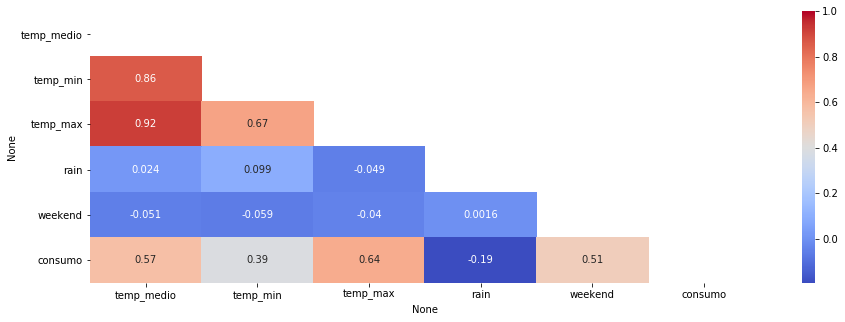

In [42]:
    masko = np.zeros_like(corm, dtype=np.bool)
    masko[np.triu_indices_from(masko)] = True

    fig, axes = plt.subplots(figsize=(15, 5))
    sns.heatmap(corm, mask = masko, cmap='coolwarm', annot=True)
    plt.show()

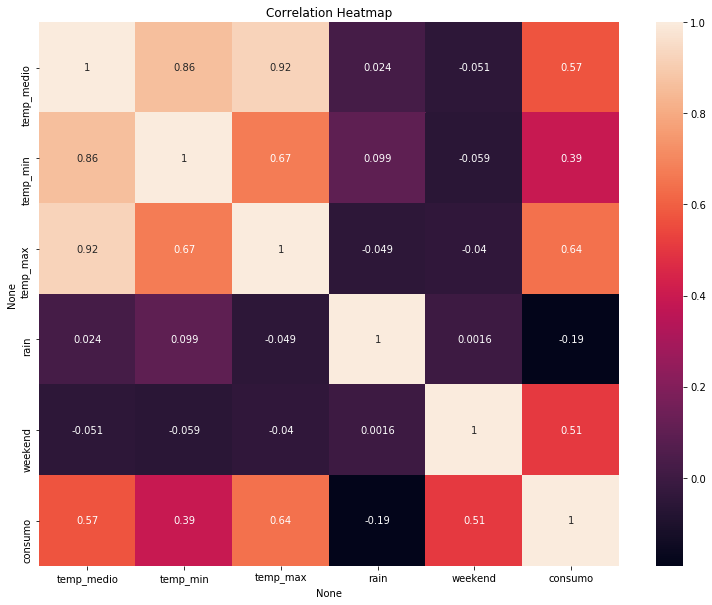

In [118]:
# Correlation Heat Map

# Keep an eye on rain and temp_min

plt.figure(figsize=(13,10))
sns.heatmap(corm,annot=True)
plt.title("Correlation Heatmap")
plt.show()

Behaviour of our dependent variable.

In the next steps we will observe the behavior of our dependent variable (Consumption) related to Maximum Temperature, Rain and Weekend.

## 3. Building Model

### Normal linear Regression

In [131]:
from sklearn.model_selection import train_test_split

In [133]:
# Creating the X and Y variables

x=beer[['temp_min','temp_max','rain','weekend']]
y=beer['consumo']

In [139]:
# Splitting the Train & Test Data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [140]:
# Cheking the shape:

print(' The shape of x_train is: ', x_train.shape)
print(' The shape of x_test is: ', x_test.shape)

 The shape of x_train is:  (255, 4)
 The shape of x_test is:  (110, 4)


In [161]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [143]:
model=LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [144]:
# Train the model

model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# Determine coefficient of detemination (R2)

print('R2 is: ',model.score(x_train,y_train).round(2))


R2 is:  0.71


In [151]:
y_predict=model.predict(x_test)

In [172]:
# R-squared value for the model

r2_score(y_test,y_predict).round(2)

0.75

In [174]:
# Root Mean squared error value for the model
rmse = np.sqrt((((y_predict) - (y_test))**2).mean())
rmse

consumo    2.341534
dtype: float64

In [194]:
# how to get 𝑏₀ and 𝑏₁. You can notice that .intercept_ is a scalar, while .coef_ is an array. 

>>> print('intercept:', model.intercept_)
>>> print('slope:', model.coef_)


intercept: [6.45323124]
slope: [[-3.81030807e-03  6.70234125e-01 -5.73745785e-02  5.18330977e+00]]


##### Creating a simple simulator

In [177]:
temp_min = 20
temp_max=40
rain = 0
weekend = 1
entrance = [[temp_min,temp_max, rain, weekend]]

print('Consumption: ',(model.predict(entrance)[0]).round(2))

Consumption:  [38.41]


In [189]:
entrada = x_test[0:1]
entrada

,temp_min,temp_max,rain,weekend
193,16.7,28.7,0.0,0


In [190]:
# Average Consumption in a day of maximum temperature of 28.7,min_temp of 16.7 with precipitation of rain of 0 mm and is not weekday

model.predict(entrada)[0].round(2)

array([25.54])

### Linear Regression using statsmodel


In [228]:
import statsmodels.api as sm

import statsmodels.formula.api as smf

In [229]:
x1 = sm.add_constant(x_test)
x1.head()

,const,"(temp_min,)","(temp_max,)","(rain,)","(weekend,)"
193,1.0,16.7,28.7,0.0,0
33,1.0,18.0,31.1,1.6,0
15,1.0,22.3,32.7,2.0,0
309,1.0,18.0,22.8,0.0,0
57,1.0,20.4,31.4,0.6,0


In [230]:
print(y.head())

  consumo
0  25.461
1  28.972
2  30.814
3  29.799
4  28.900


In [238]:
results = model.fit()

In [239]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                consumo   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                              9543.
Date:                Wed, 23 Oct 2019   Prob (F-statistic):                        0.00
Time:                        14:43:41   Log-Likelihood:                         -851.66
No. Observations:                 365   AIC:                                      1711.
Df Residuals:                     361   BIC:                                      1727.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------